In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [9]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())

In [10]:
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())

In [11]:
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [12]:
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

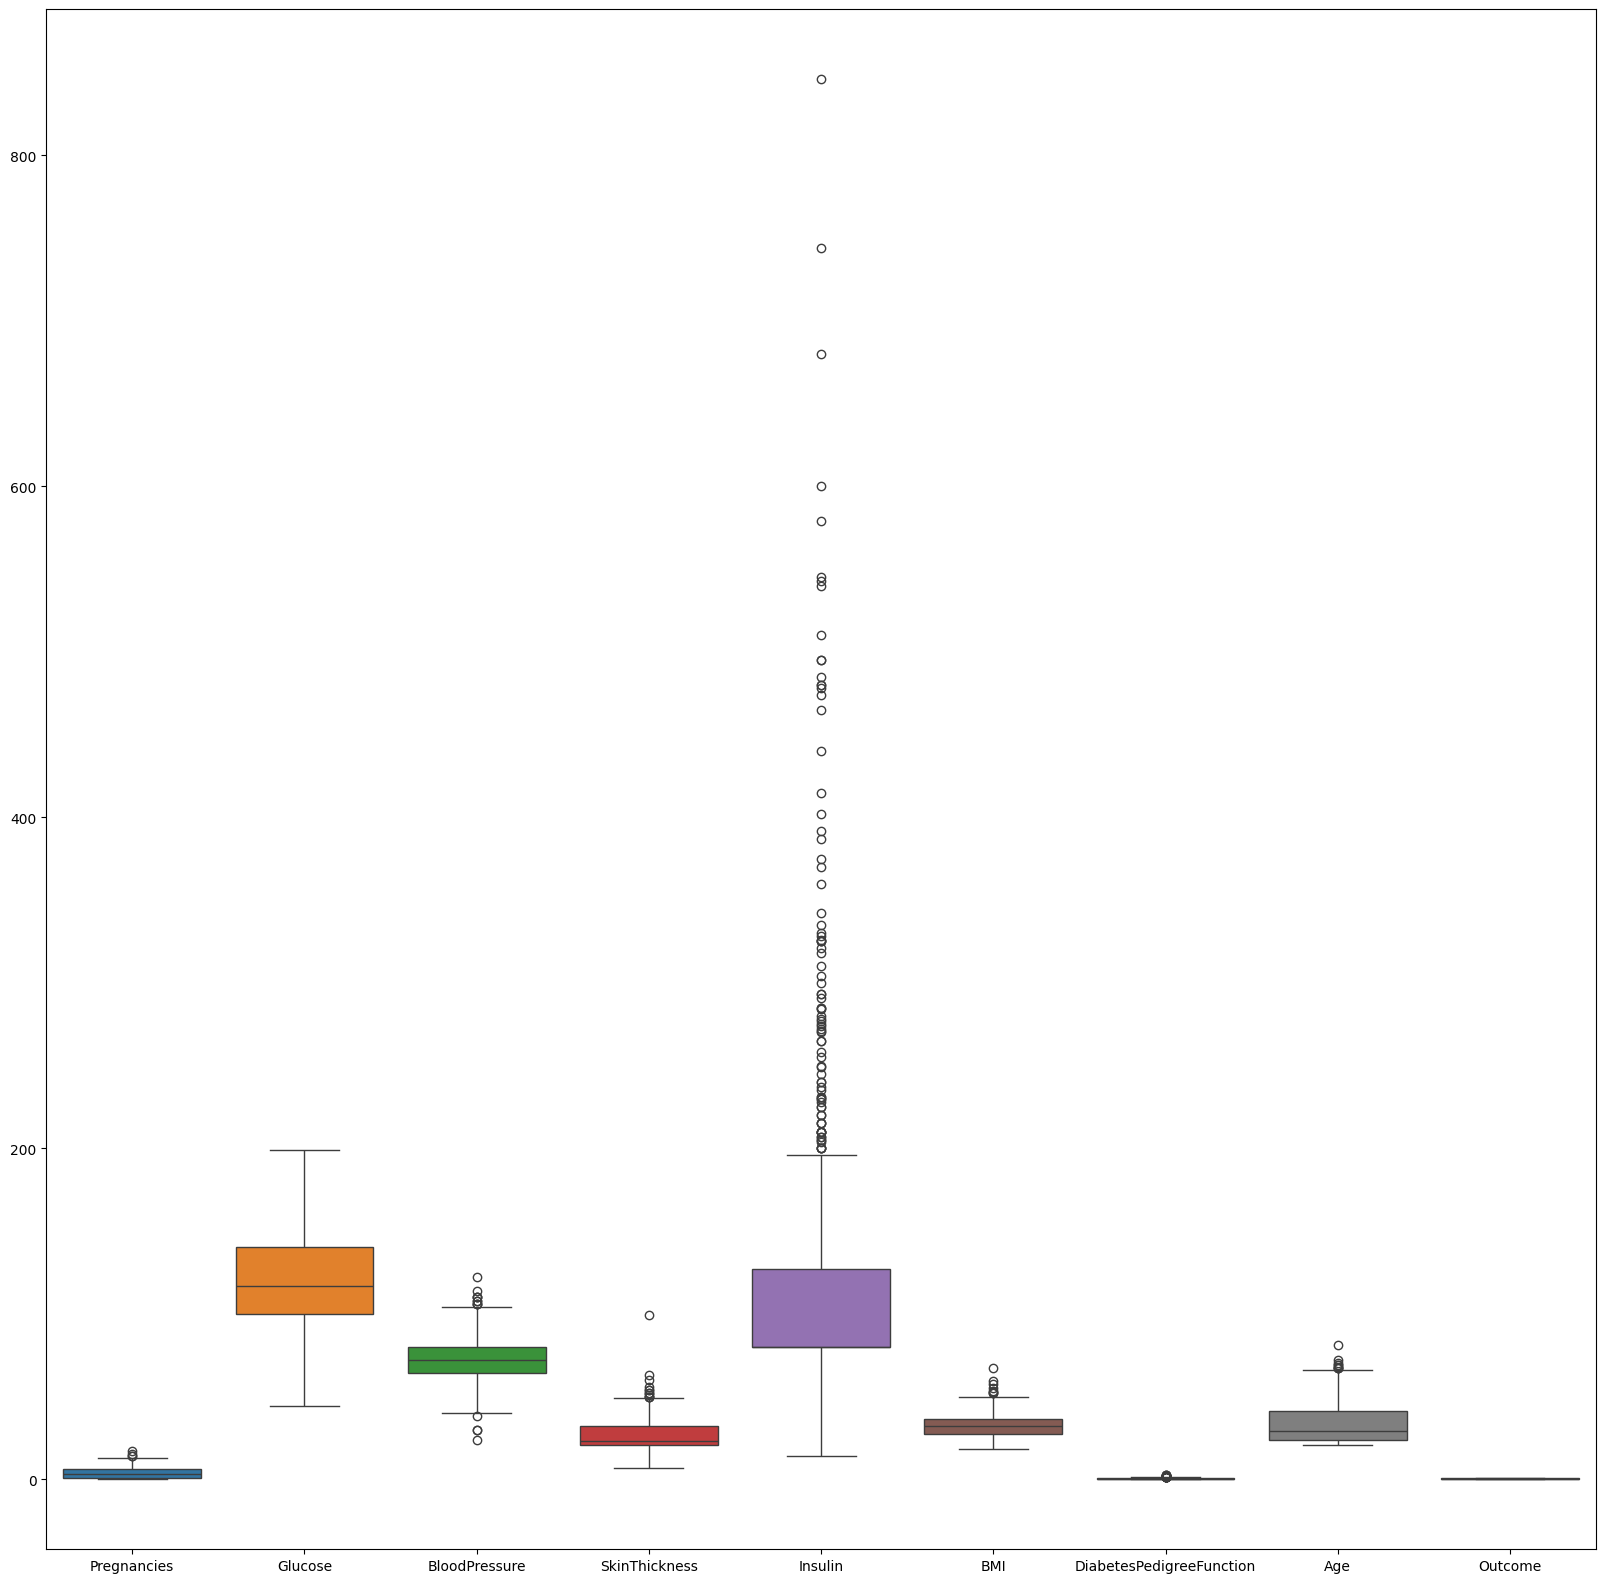

In [15]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax=ax)

In [80]:
q = df['Pregnancies'].quantile(0.99)
df1 = df[df['Pregnancies'] < q]

q = df1['BMI'].quantile(0.98)
df2 = df1[df1['BMI'] < q]

q = df2['SkinThickness'].quantile(0.99)
df3 = df2[df2['SkinThickness'] < q]

q = df3['BloodPressure'].quantile(0.99)
df4 = df3[df3['BloodPressure'] < q]

q = df4['Age'].quantile(0.96)
df5 = df4[df4['Age'] < q]

<Axes: >

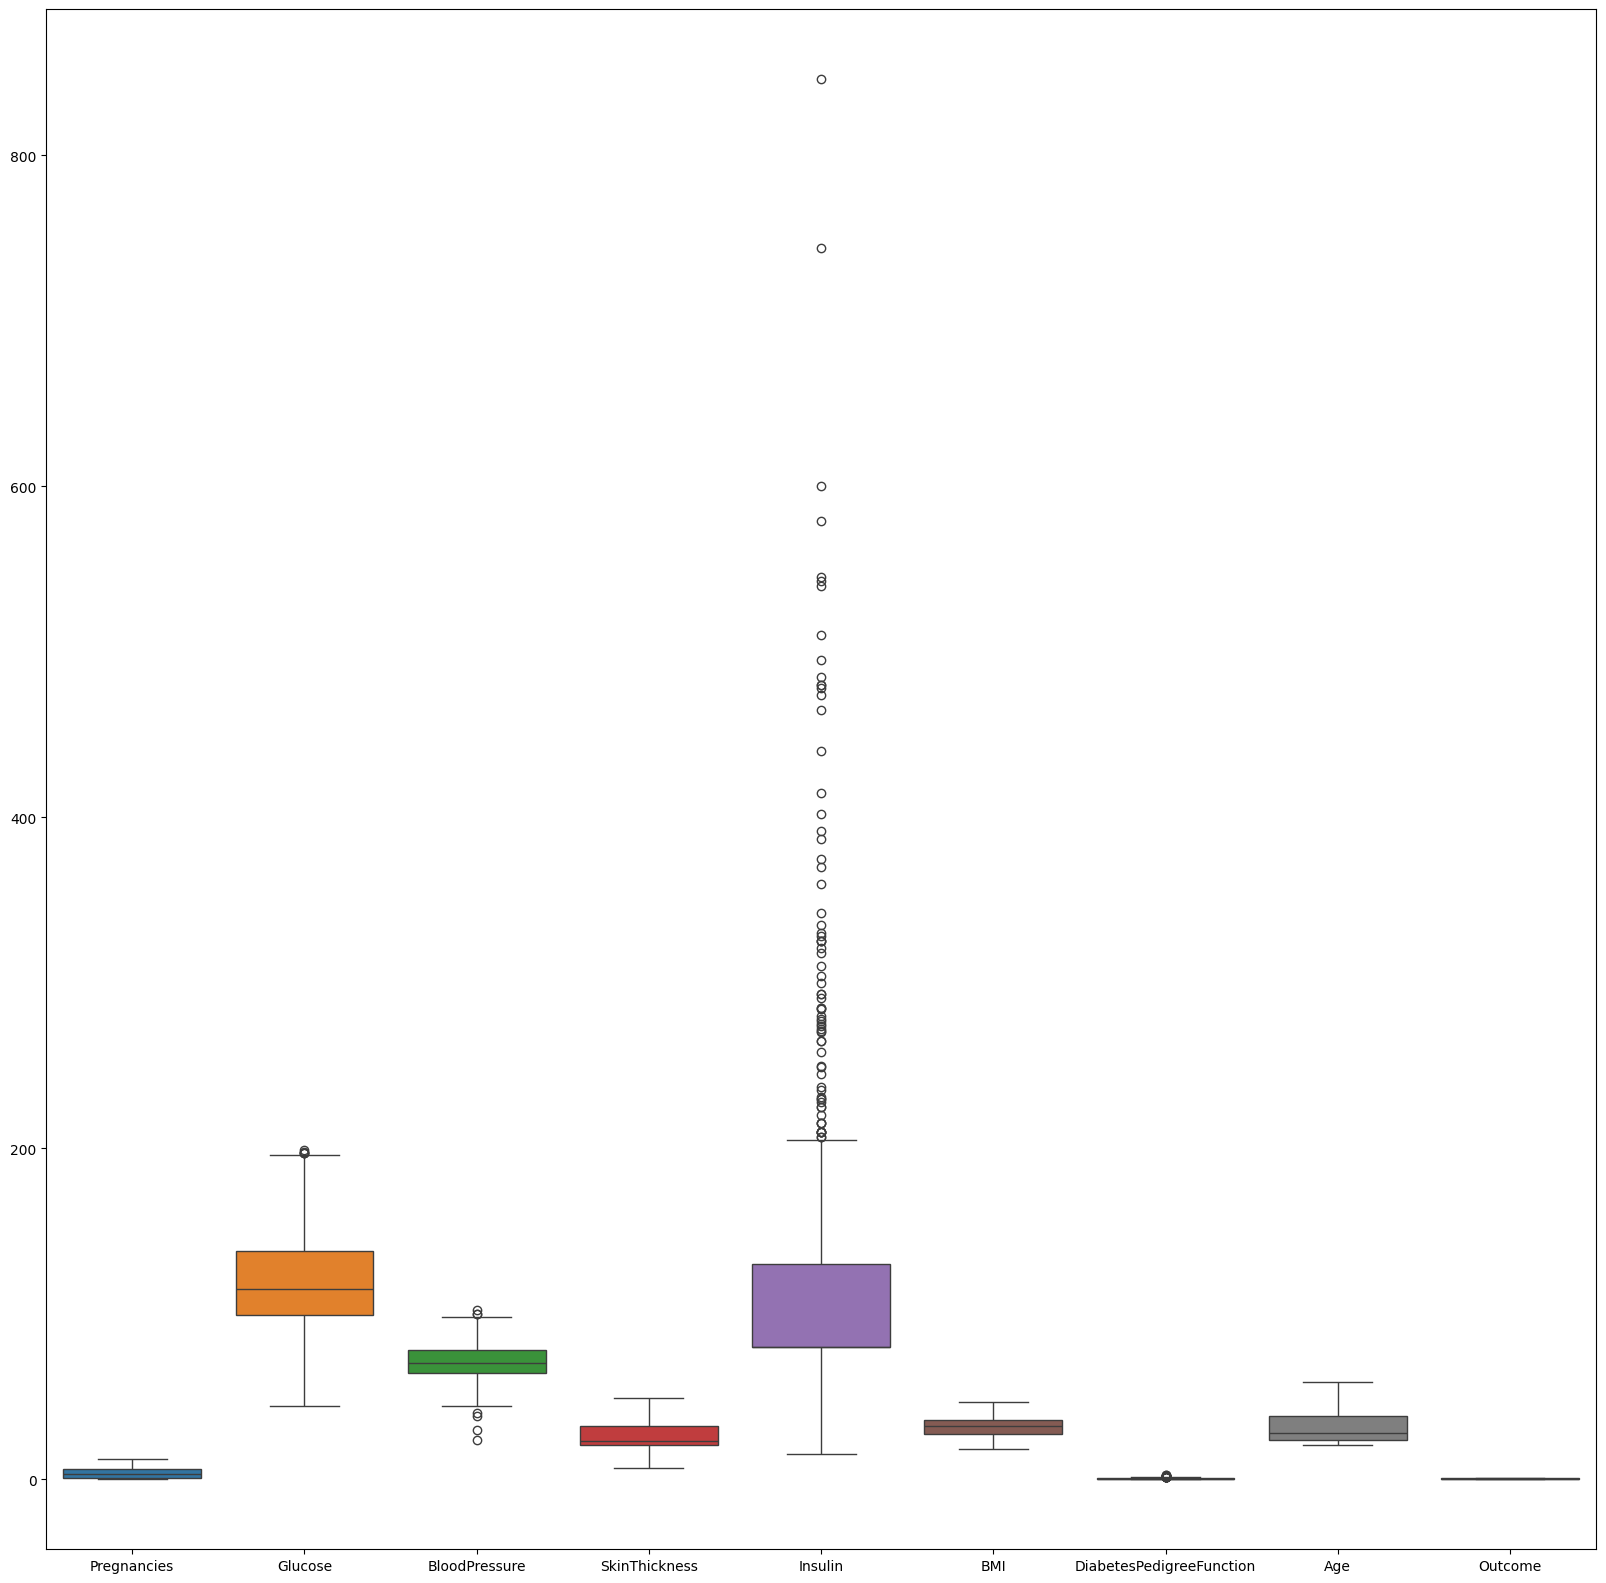

In [81]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data=df5, ax = ax)

In [83]:
y = df5['Outcome']

In [84]:
x = df5.drop(columns = ['Outcome'])

In [85]:
df5.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,3.619392,120.045547,71.149602,26.103632,119.253011,31.951702,0.473003,31.594790,0.337192
std,3.094853,29.829894,11.064854,8.704853,92.771685,6.204626,0.332000,9.839328,0.473094
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,79.799479,27.450000,0.244000,24.000000,0.000000
50%,3.000000,115.000000,70.000000,23.000000,79.799479,31.992578,0.370000,28.000000,0.000000
75%,6.000000,138.000000,78.000000,32.000000,130.000000,35.900000,0.628000,38.000000,1.000000
max,12.000000,199.000000,102.000000,49.000000,846.000000,46.800000,2.329000,59.000000,1.000000


In [92]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x))

<Axes: >

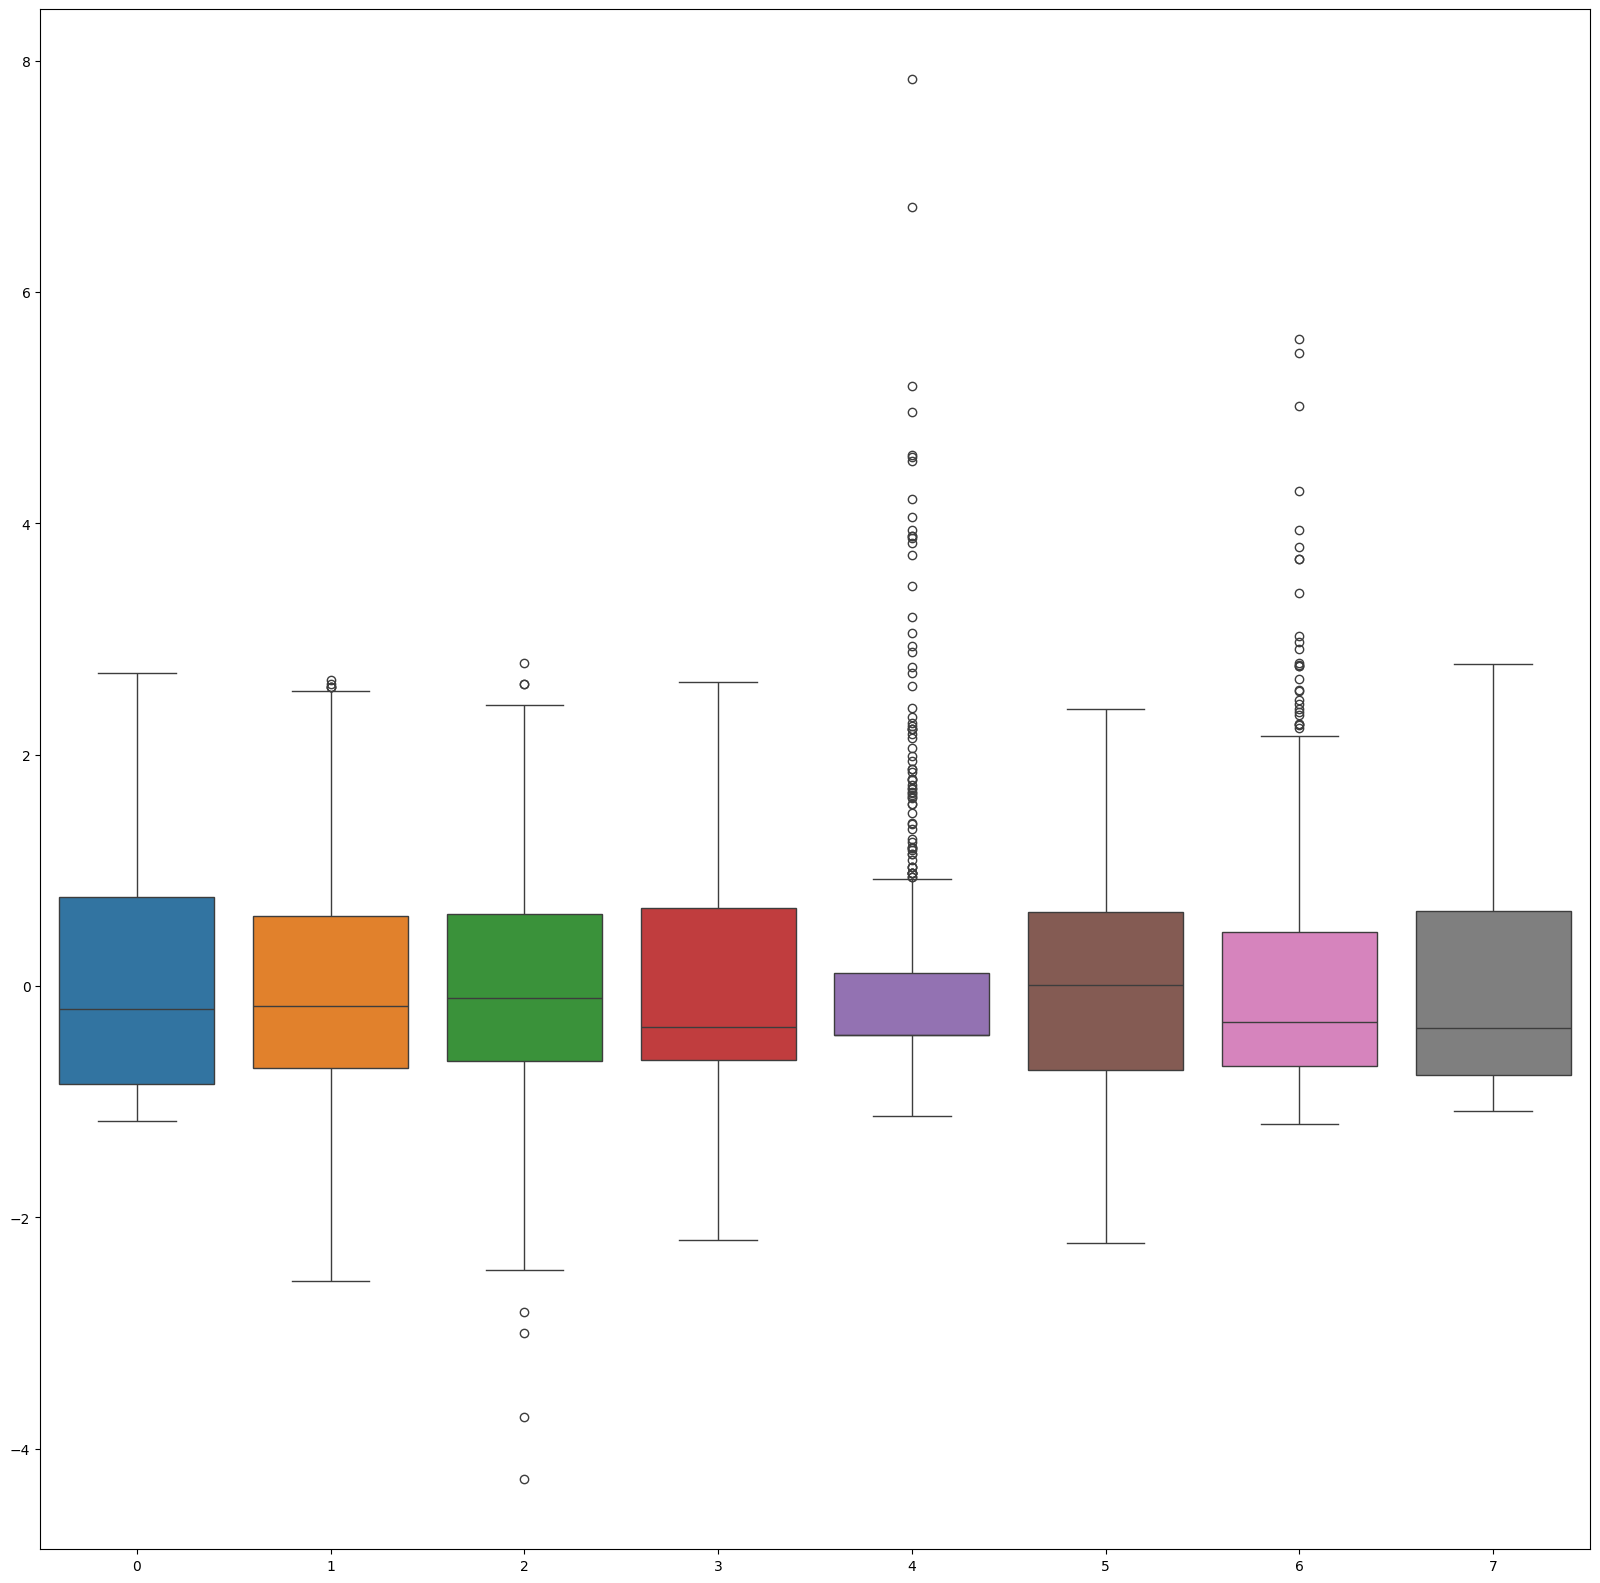

In [93]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data=x_scaled, ax = ax)

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()

In [95]:
vif_df['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif_df['feature'] =x.columns

In [96]:
vif_df

,vif,feature
0,1.600220,Pregnancies
1,1.357167,Glucose
2,1.220221,BloodPressure
3,1.515702,SkinThickness
4,1.348726,Insulin
5,1.548813,BMI
6,1.059329,DiabetesPedigreeFunction
7,1.789201,Age


In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.2, random_state = 144)

In [100]:
logr = LogisticRegression(verbose=1)

In [101]:
logr.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [115]:
y_predict = logr.predict(x_test)

In [107]:
logr.predict_proba(x_test)

array([[0.64360281, 0.35639719],
       [0.67820252, 0.32179748],
       [0.15153313, 0.84846687],
       [0.06131546, 0.93868454],
       [0.07625074, 0.92374926],
       [0.88848308, 0.11151692],
       [0.53057927, 0.46942073],
       [0.69792286, 0.30207714],
       [0.96220113, 0.03779887],
       [0.77485619, 0.22514381],
       [0.69345622, 0.30654378],
       [0.04635079, 0.95364921],
       [0.832805  , 0.167195  ],
       [0.90892425, 0.09107575],
       [0.80288536, 0.19711464],
       [0.57363881, 0.42636119],
       [0.85253497, 0.14746503],
       [0.66473318, 0.33526682],
       [0.8508312 , 0.1491688 ],
       [0.61638105, 0.38361895],
       [0.9884227 , 0.0115773 ],
       [0.96318119, 0.03681881],
       [0.74012025, 0.25987975],
       [0.42008874, 0.57991126],
       [0.55004706, 0.44995294],
       [0.91514853, 0.08485147],
       [0.0871175 , 0.9128825 ],
       [0.61946754, 0.38053246],
       [0.55589245, 0.44410755],
       [0.90592345, 0.09407655],
       [0.

In [108]:
logr.predict_log_proba(x_test)

array([[-0.4406735 , -1.03170947],
       [-0.38830933, -1.13383287],
       [-1.88695099, -0.16432424],
       [-2.79172328, -0.06327581],
       [-2.57372811, -0.07931461],
       [-0.11823967, -2.19357897],
       [-0.6337859 , -0.75625584],
       [-0.3596467 , -1.19707287],
       [-0.03853177, -3.2754761 ],
       [-0.25507783, -1.49101593],
       [-0.36606718, -1.18239468],
       [-3.07151686, -0.04745938],
       [-0.18295575, -1.7885945 ],
       [-0.09549352, -2.39606373],
       [-0.21954334, -1.62396981],
       [-0.55575534, -0.85246842],
       [-0.15954105, -1.91416423],
       [-0.40836954, -1.0928286 ],
       [-0.16154152, -1.90267675],
       [-0.48388991, -0.95810555],
       [-0.01164484, -4.45870915],
       [-0.03751374, -3.3017463 ],
       [-0.30094261, -1.34753624],
       [-0.86728931, -0.54488019],
       [-0.59775145, -0.79861227],
       [-0.0886689 , -2.46685299],
       [-2.44049745, -0.09114811],
       [-0.47889498, -0.96618379],
       [-0.58718044,

In [109]:
y_test

583    0
264    1
260    0
259    1
498    1
      ..
438    0
589    0
560    1
643    0
607    0
Name: Outcome, Length: 139, dtype: int64

In [112]:
logr_liblinear = LogisticRegression(solver='liblinear')

In [113]:
logr_liblinear.fit(x_train,y_train) 

LogisticRegression(solver='liblinear')

In [114]:
y_predict_liblinear = logr_liblinear.predict(x_test)

In [116]:
confusion_matrix(y_test,y_predict)

array([[86,  6],
       [20, 27]], dtype=int64)

In [122]:
confusion_matrix(y_test,y_predict_liblinear)

array([[86,  6],
       [20, 27]], dtype=int64)

In [117]:
def model_eval(y_test, y_pred):
    tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy = ((tp+tn)/(tn+fp+fn+tp))
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    specificity = tn/(fp+tn)
    f1_score = 2*(recall*precision)/(recall+precision)
    result = {'Accuracy':accuracy,'Precision':precision,'Recall':recall, 'Specificity':specificity, 'f1_score':f1_score}
    return result

In [118]:
model_eval(y_test,y_predict)

{'Accuracy': 0.8129496402877698,
 'Precision': 0.8181818181818182,
 'Recall': 0.574468085106383,
 'Specificity': 0.9347826086956522,
 'f1_score': 0.675}

In [119]:
model_eval(y_test,y_predict_liblinear)

{'Accuracy': 0.8129496402877698,
 'Precision': 0.8181818181818182,
 'Recall': 0.574468085106383,
 'Specificity': 0.9347826086956522,
 'f1_score': 0.675}

In [120]:
roc_auc_score(y_test,y_predict)

0.7546253469010176

In [121]:
roc_auc_score(y_test,y_predict_liblinear)

0.7546253469010176

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_predict)